In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd
import warnings
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn._oldcore")

In [64]:
import os

# Set environment variable to avoid memory leak warning on Windows with MKL
os.environ["OMP_NUM_THREADS"] = "2"

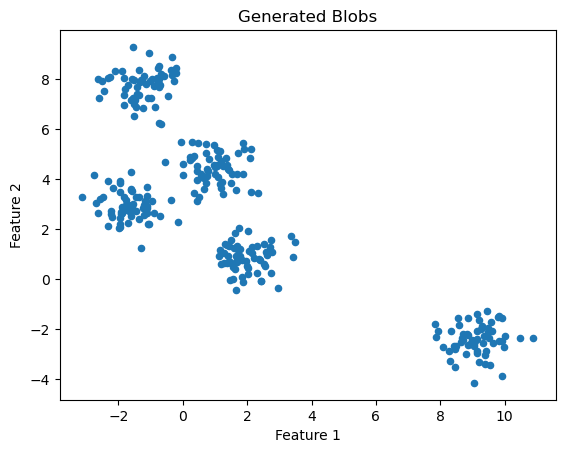

In [69]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_blobs(n_samples=300, centers=5, n_features=2, cluster_std=0.60, random_state=0)

# Visualize the blobs
plt.scatter(X[:, 0], X[:, 1], s=20)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Blobs')
plt.show()

In [11]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X)


D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In the context of clustering, an instance’s label is the index of the cluster to which the
algorithm assigns this instance

In [18]:
print(y_pred is kmeans.labels_)
y_pred

True


array([2, 4, 1, 2, 3, 3, 0, 1, 0, 4, 2, 2, 1, 4, 4, 1, 1, 0, 2, 3, 0, 3,
       1, 2, 3, 1, 3, 0, 4, 3, 0, 2, 1, 2, 2, 4, 0, 4, 3, 0, 1, 3, 1, 1,
       2, 3, 0, 3, 2, 3, 3, 0, 3, 3, 2, 3, 0, 4, 4, 2, 3, 0, 3, 4, 4, 2,
       2, 4, 3, 2, 3, 0, 2, 2, 2, 2, 2, 4, 1, 0, 4, 4, 1, 2, 2, 4, 0, 0,
       0, 3, 4, 0, 0, 2, 3, 4, 1, 4, 4, 1, 2, 3, 0, 4, 0, 1, 3, 0, 1, 3,
       1, 4, 3, 0, 2, 0, 1, 2, 3, 0, 1, 4, 2, 4, 2, 3, 3, 0, 0, 4, 0, 4,
       2, 4, 4, 0, 2, 2, 3, 2, 1, 2, 2, 3, 1, 3, 1, 3, 4, 1, 2, 4, 2, 1,
       2, 1, 3, 4, 2, 4, 3, 1, 4, 1, 1, 3, 1, 2, 4, 1, 0, 0, 1, 2, 0, 1,
       4, 4, 3, 0, 1, 3, 0, 1, 3, 4, 0, 1, 1, 1, 3, 2, 1, 4, 1, 1, 4, 3,
       4, 0, 3, 2, 1, 4, 0, 4, 1, 2, 3, 4, 0, 2, 0, 3, 1, 1, 4, 3, 3, 3,
       0, 1, 2, 0, 0, 3, 3, 4, 1, 4, 4, 1, 1, 2, 1, 3, 3, 1, 2, 0, 4, 2,
       4, 0, 1, 0, 2, 2, 4, 2, 4, 4, 4, 0, 3, 0, 0, 3, 4, 0, 0, 2, 1, 1,
       4, 0, 4, 4, 1, 2, 1, 3, 0, 4, 3, 1, 0, 0, 0, 1, 2, 2, 0, 0, 1, 3,
       0, 3, 4, 4, 2, 0, 3, 3, 2, 2, 2, 3, 0, 1])

In [19]:
kmeans.cluster_centers_

array([[ 2.00401597,  0.84371973],
       [ 0.96475862,  4.4261437 ],
       [ 9.12239104, -2.42822185],
       [-1.66877007,  2.91652498],
       [-1.24268927,  7.75317247]])

In [20]:
# You can easily assign new instances to the cluster whose centroid is closest:
import numpy as np
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([3, 0, 3, 3])

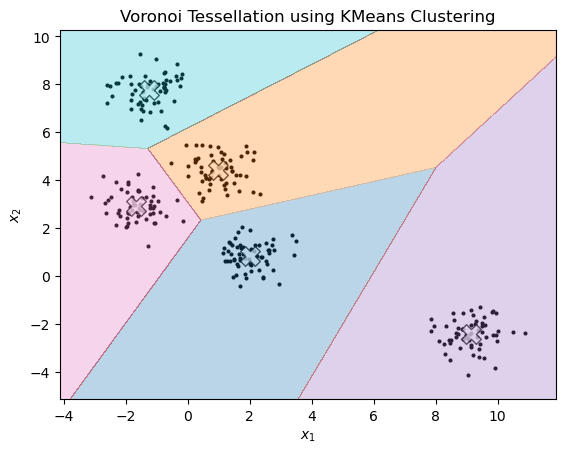

In [24]:
# Visualize the clusters and decision boundaries (Voronoi tessellation)
plt.scatter(X[:, 0], X[:, 1], c='black', s=15, marker='.')

# Plot the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.75, edgecolors='black', marker='X')

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict cluster labels for each point in the mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')

# Set plot title and labels
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Voronoi Tessellation using KMeans Clustering')

plt.show()

- a few instances were probably mislabeled, especially near the
boundary
- the kmeans algorithm does not behave very well when the blobs have very
different diameters because all it cares about when assigning an instance to a
cluster is the distance to the centroid

In [ ]:
Instead of assigning each instance to a single cluster, which is called hard
clustering, it can be useful to give each instance a score per cluster, which is
called soft clustering

In [25]:
# In the KMeans class, the transform() method measures the distance from each instance to every centroid:

kmeans.transform(X_new).round(2)

array([[ 2.31,  2.61, 10.14,  1.9 ,  5.89],
       [ 1.53,  3.17,  7.56,  4.76,  7.15],
       [ 5.45,  4.21, 13.28,  1.33,  5.07],
       [ 5.27,  4.41, 13.09,  1.39,  5.54]])

### Dimensionality Reduction using KMeans

D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
D:\software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_con

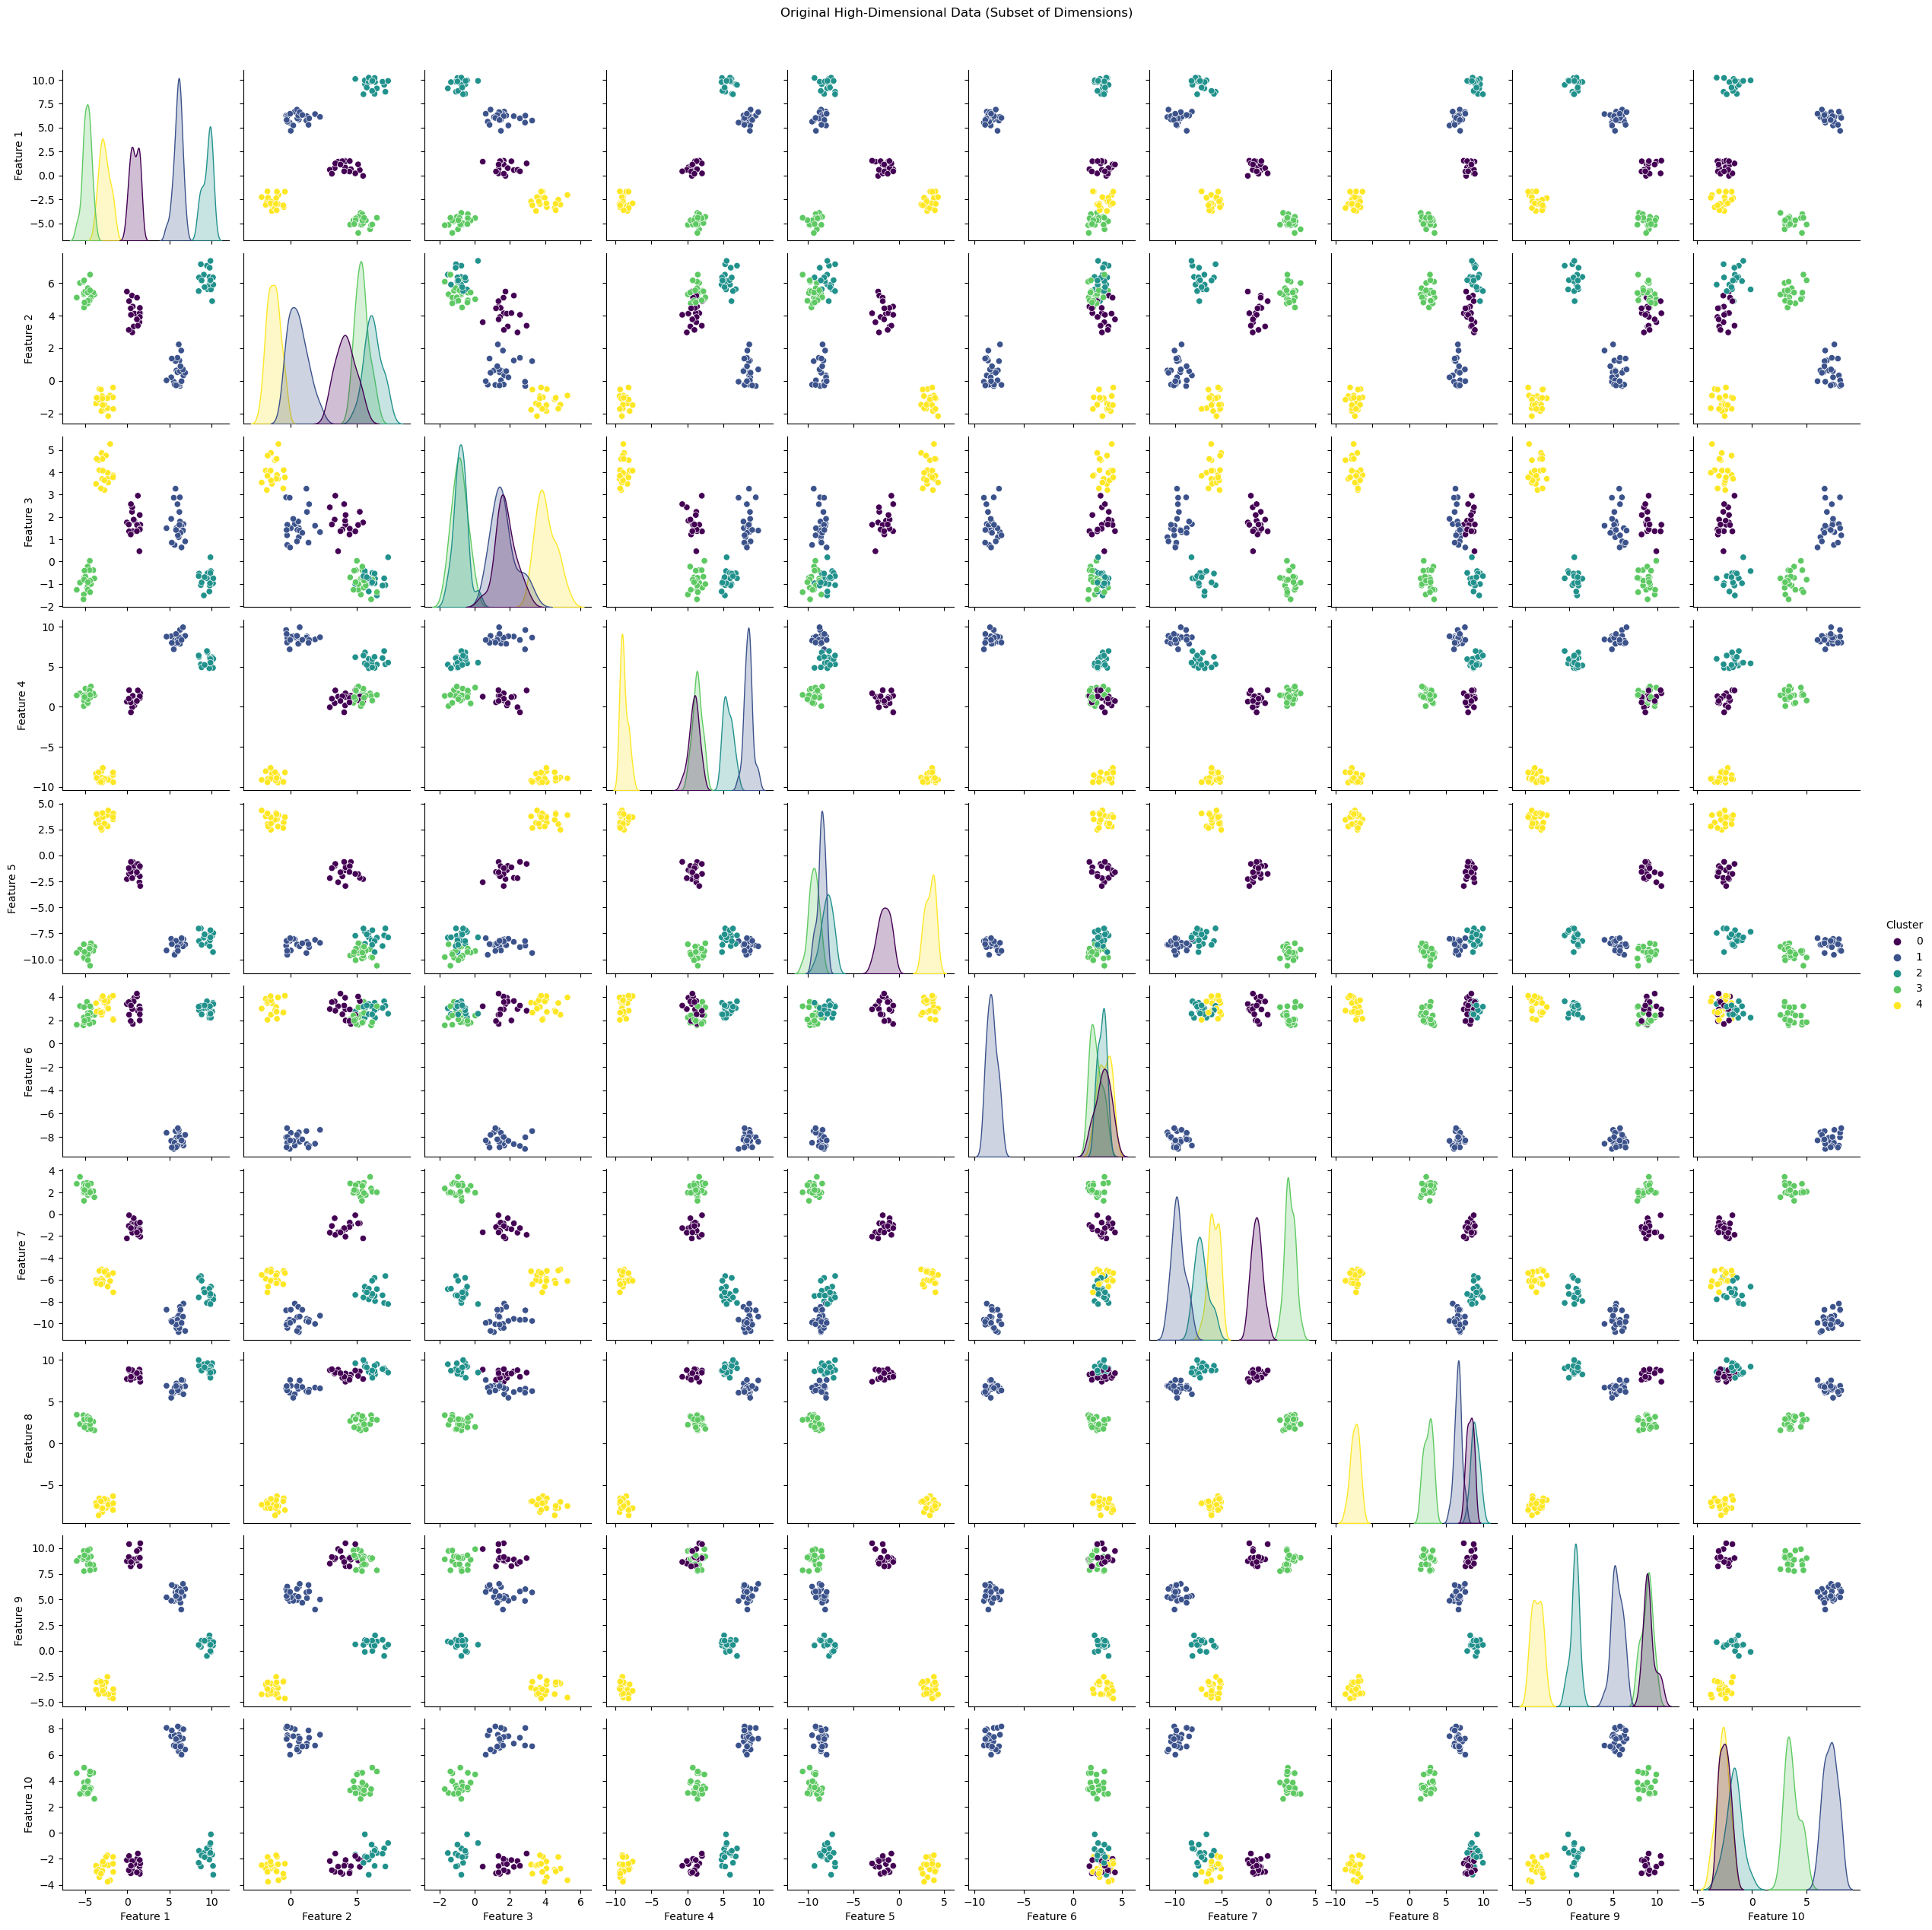

D:\software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\software\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

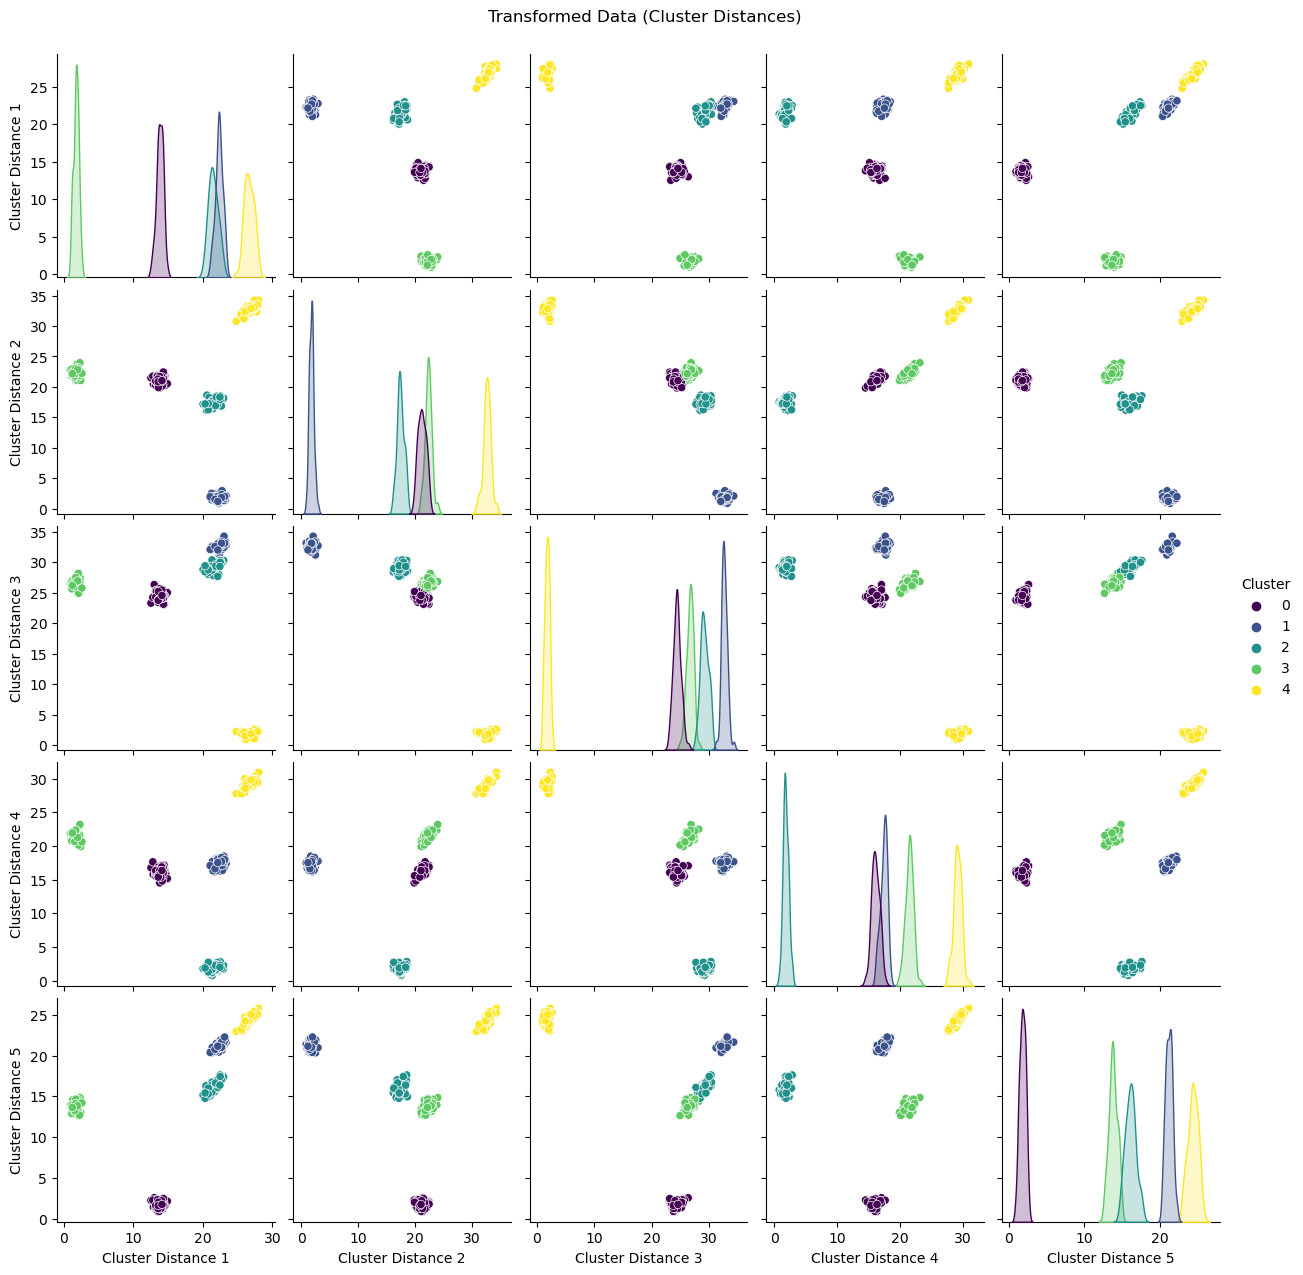

Original shape: (300, 10)
Transformed shape: (300, 5)


In [41]:
# how transformation using kmeans can used as dimensionality reduction technique:

# Generate high-dimensional sample data
X, y = make_blobs(n_samples=300, centers=5, n_features=10, cluster_std=0.60, random_state=0)

# Define the number of clusters
k = 5

# Initialize and fit the KMeans model with n_init explicitly set
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

# Transform the data into the distance space
X_transformed = kmeans.transform(X)

# Create DataFrames for the original and transformed data
original_df = pd.DataFrame(X, columns=[f'Feature {i+1}' for i in range(X.shape[1])])
transformed_df = pd.DataFrame(X_transformed, columns=[f'Cluster Distance {i+1}' for i in range(k)])
original_df['Cluster'] = y
transformed_df['Cluster'] = y

# Plot the original high-dimensional data (using a subset of dimensions for visualization)
sns.pairplot(original_df.sample(100), hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Original High-Dimensional Data (Subset of Dimensions)', y=1.02)
plt.show()

# Plot the transformed data
sns.pairplot(transformed_df, hue='Cluster', palette='viridis', diag_kind='kde')
plt.suptitle('Transformed Data (Cluster Distances)', y=1.02)
plt.show()

# Check the shapes
print("Original shape:", X.shape)
print("Transformed shape:", X_transformed.shape)

D:\software\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Original shape: (300, 50)
Transformed shape: (300, 5)


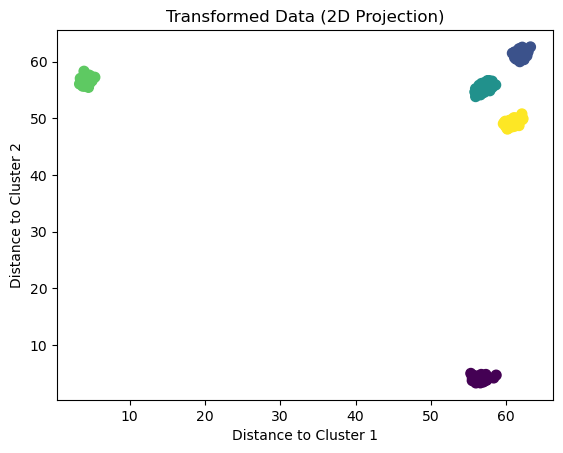

In [40]:
# Another Example

# Generate high-dimensional sample data
X, y = make_blobs(n_samples=300, centers=5, n_features=50, cluster_std=0.60, random_state=0)

# Define the number of clusters
k = 5

# Initialize and fit the KMeans model with n_init explicitly set
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
kmeans.fit(X)

# Transform the data into the distance space
X_transformed = kmeans.transform(X)

# Check the shapes
print("Original shape:", X.shape)
print("Transformed shape:", X_transformed.shape)

# For visualization, we'll take the first two dimensions of the transformed data
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, s=50, cmap='viridis')
plt.xlabel('Distance to Cluster 1')
plt.ylabel('Distance to Cluster 2')
plt.title('Transformed Data (2D Projection)')
plt.show()

### How does the k-means algorithm work?

Initial Centroids: Start by placing centroids randomly, for example, by picking k instances from the dataset.

Label Instances: Assign each data point to the nearest centroid.

Update Centroids: Move the centroids to the mean position of the points assigned to them.

Repeat: Keep labeling instances and updating centroids until the centroids stop moving.

The algorithm will always finish in a finite number of steps because the distance between points and their closest centroids always decreases, and it can't be negative.

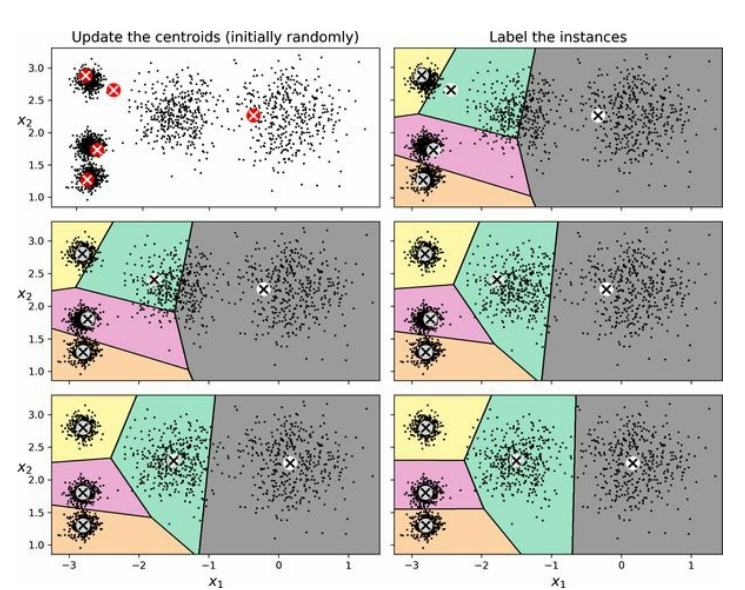!

Although the algorithm is guaranteed to converge, it may not find the optimal solution, often settling on a local optimum. This depends on the initial placement of centroids. Image bebow shows two suboptimal outcomes that can result from poor random initialization.

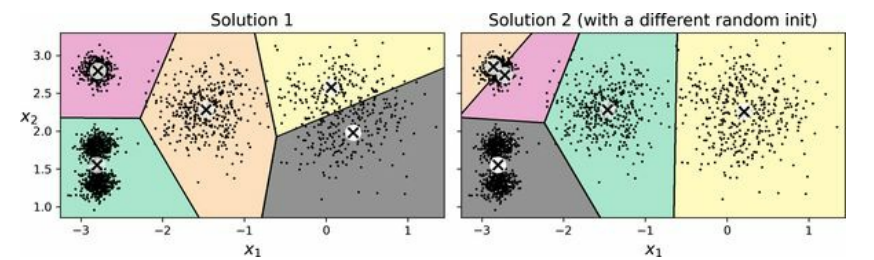

### Centroid Initiation Methods

### 1. Using Custom Initial Centroids in K-Means

- If you roughly know the centroids' locations:
  - Set the `init` hyperparameter to a NumPy array of these centroids.
  - Set `n_init` to 1.


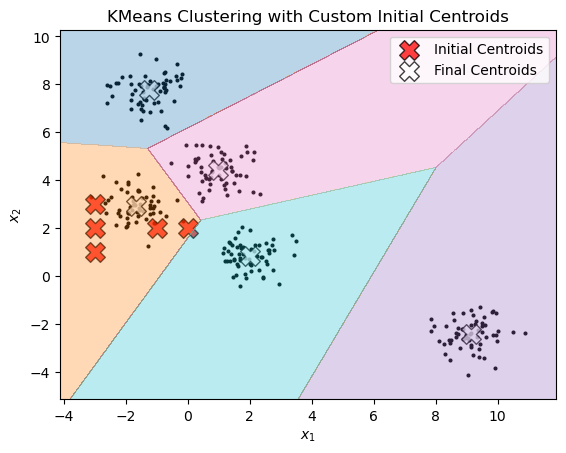

In [48]:
# Generate sample data with 2 features
X, y = make_blobs(n_samples=300, centers=5, n_features=2, cluster_std=0.60, random_state=0)

# Generate appropriate initial centroids with the same number of features as the data
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])

# Initialize and fit the KMeans model with the custom initial centroids
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)
kmeans.fit(X)

# Visualize the clusters and initial centroids
plt.scatter(X[:, 0], X[:, 1], c='black', s=15, marker='.')

# Plot the initial centroids
plt.scatter(good_init[:, 0], good_init[:, 1], c='red', s=200, alpha=0.75, edgecolors='black', marker='X', label='Initial Centroids')

# Plot the final centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200, alpha=0.75, edgecolors='black', marker='X', label='Final Centroids')

# Create a mesh grid for plotting decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict cluster labels for each point in the mesh grid
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='tab10')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('KMeans Clustering with Custom Initial Centroids')
plt.legend()
plt.show()

### 2. Optimizing K-Means Clustering with Multiple Initializations

- Run the algorithm multiple times with different random initializations.
- The `n_init` hyperparameter controls the number of random initializations (default is 10).
- The algorithm runs `n_init` times when you call `fit()`.
- Scikit-Learn keeps the best solution based on a performance metric.
- The performance metric used is the model’s inertia (sum of squared distances between instances and their closest centroids).


Model's inertia: 211.21561192615175
Model's score: -211.21561192615178


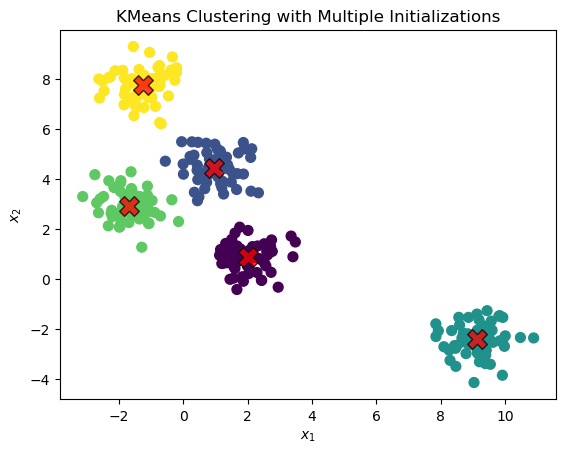

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Initialize and fit the KMeans model with multiple random initializations
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
kmeans.fit(X)

# Access the model's inertia
inertia = kmeans.inertia_
print("Model's inertia:", inertia)

# Get the score (negative inertia)
score = kmeans.score(X)
print("Model's score:", score)

# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, edgecolors='black', marker='X')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('KMeans Clustering with Multiple Initializations')
plt.show()


### K-Means++ Initialization

In 2006, David Arthur and Sergei Vassilvitskii proposed an improvement to the k-means algorithm called k-means++. This smarter initialization step selects centroids that are distant from each other, reducing the likelihood of converging to a suboptimal solution. Although it adds some computational overhead, it significantly decreases the number of runs needed to find the optimal solution.

The k-means++ algorithm works as follows:
1. Choose one centroid randomly from the dataset.
2. Select the next centroid with a probability proportional to the square of its distance from the closest already chosen centroid. This ensures that points farther from existing centroids are more likely to be chosen.
3. Repeat until all k centroids are chosen.

The `KMeans` class in Scikit-Learn uses k-means++ initialization by default.


Model's inertia: 211.21561192615175
Model's score: -211.21561192615178


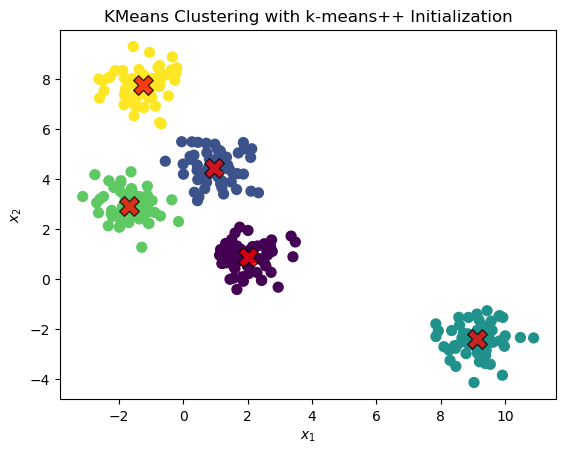

In [51]:
# Generate sample data
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Initialize and fit the KMeans model using k-means++ initialization (default)
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, random_state=42)
kmeans.fit(X)

# Access the model's inertia
inertia = kmeans.inertia_
print("Model's inertia:", inertia)

# Get the score (negative inertia)
score = kmeans.score(X)
print("Model's score:", score)

# Visualize the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, alpha=0.75, edgecolors='black', marker='X')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('KMeans Clustering with k-means++ Initialization')
plt.show()

### Finding the Optimal Number of Clusters

Determining the correct number of clusters \( k \) isn't always straightforward. Setting \( k \) incorrectly can lead to poor results, as seen when \( k \) is 3 or 8 in Figure 9-7.

One might think to choose the model with the lowest inertia, but this isn't reliable. The inertia decreases as \( k \) increases because more clusters result in closer instances to centroids. For example, inertia for \( k=3 \) is about 653.2, for \( k=5 \) is 211.6, and for \( k=8 \) is 119.1.

To find the optimal \( k \), plot the inertia against \( k \). The plot often shows an "elbow" point, indicating the best \( k \) (see Figure 9-8).


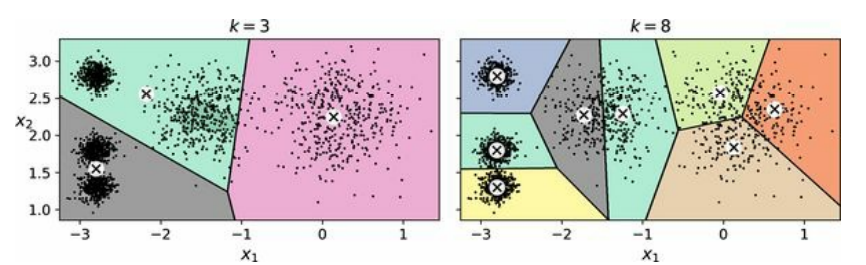

#### Inertia and Elbow Curve

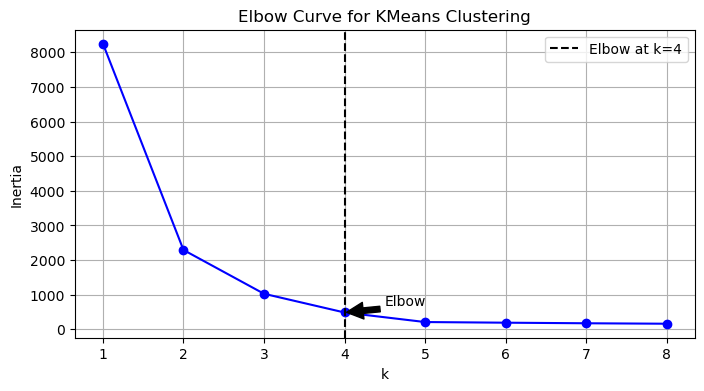

In [56]:
# Plotting the Elbow Curve

# Generate sample data
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Range of k values to evaluate
k_values = range(1, 9)
inertia_values = []

# Compute inertia for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Curve for KMeans Clustering')
plt.axvline(x=4, color='black', linestyle='--', label='Elbow at k=4')
plt.annotate('Elbow', xy=(4, inertia_values[3]), xytext=(4.5, inertia_values[3] + 200),
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.grid(True)
plt.legend()
plt.show()

- The inertia drops quickly as k increases up to 4.
- After k = 4, the inertia decreases more slowly.
- The curve forms an "elbow" at k = 4.
- k = 4 is a good choice:
  - Lower values are inadequate.
  - Higher values unnecessarily split good clusters.


#### Silhouette Score

The elbow method is a coarse technique. A more precise approach is the silhouette score, which measures how similar each instance is to its own cluster compared to other clusters. 

- **Silhouette Coefficient**: 
  - Calculated as \((b - a) / \max(a, b)\)
  - \(a\) = mean intra-cluster distance
  - \(b\) = mean nearest-cluster distance
  - Ranges from -1 to +1
  - Close to +1: instance well inside its cluster
  - Close to 0: instance near a cluster boundary
  - Close to -1: instance possibly in the wrong cluster

To compute the silhouette score, use Scikit-Learn’s `silhouette_score()` function with the dataset and assigned labels.


In [52]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_) # this will be different from the 

0.7222571625994793

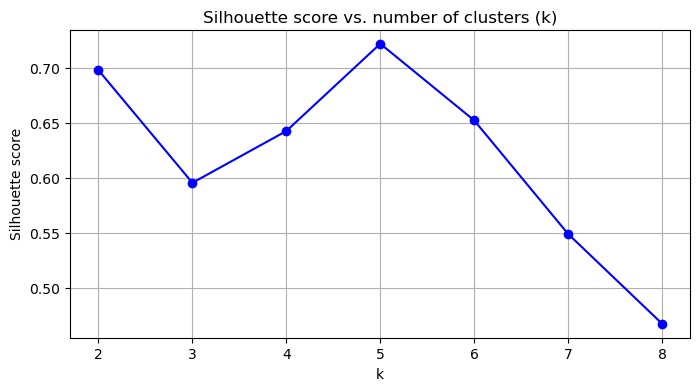

In [54]:
# plotting the silhouette scores

# Generate sample data
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Range of k values to evaluate
k_values = range(2, 9)
silhouette_scores = []

# Compute silhouette scores for different values of k
for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Plot the silhouette scores
plt.figure(figsize=(8, 4))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs. number of clusters (k)')
plt.grid(True)
plt.show()

#### Comparing Silhouette Scores for Different Numbers of Clusters

- Silhouette scores provide a richer visualization than inertia.
- Confirms that k = 5 is a very good choice.
- Highlights that \( k = 2 \) is also quite good.
- Shows that \( k = 5 \) is much better than \( k = 6 \) or \( k = 7 \).
- This insight was not visible when comparing inertias.

### Silhouette Diagram

- A silhouette diagram plots each instance's silhouette coefficient, sorted by clusters and coefficient values.
- Each cluster appears as a "knife shape":
  - Height indicates the number of instances in the cluster.
  - Width represents the sorted silhouette coefficients (wider is better).
- Vertical dashed lines show the mean silhouette score for each number of clusters.
- Clusters with many instances ending to the left of the dashed line are poor, indicating instances are too close to other clusters.


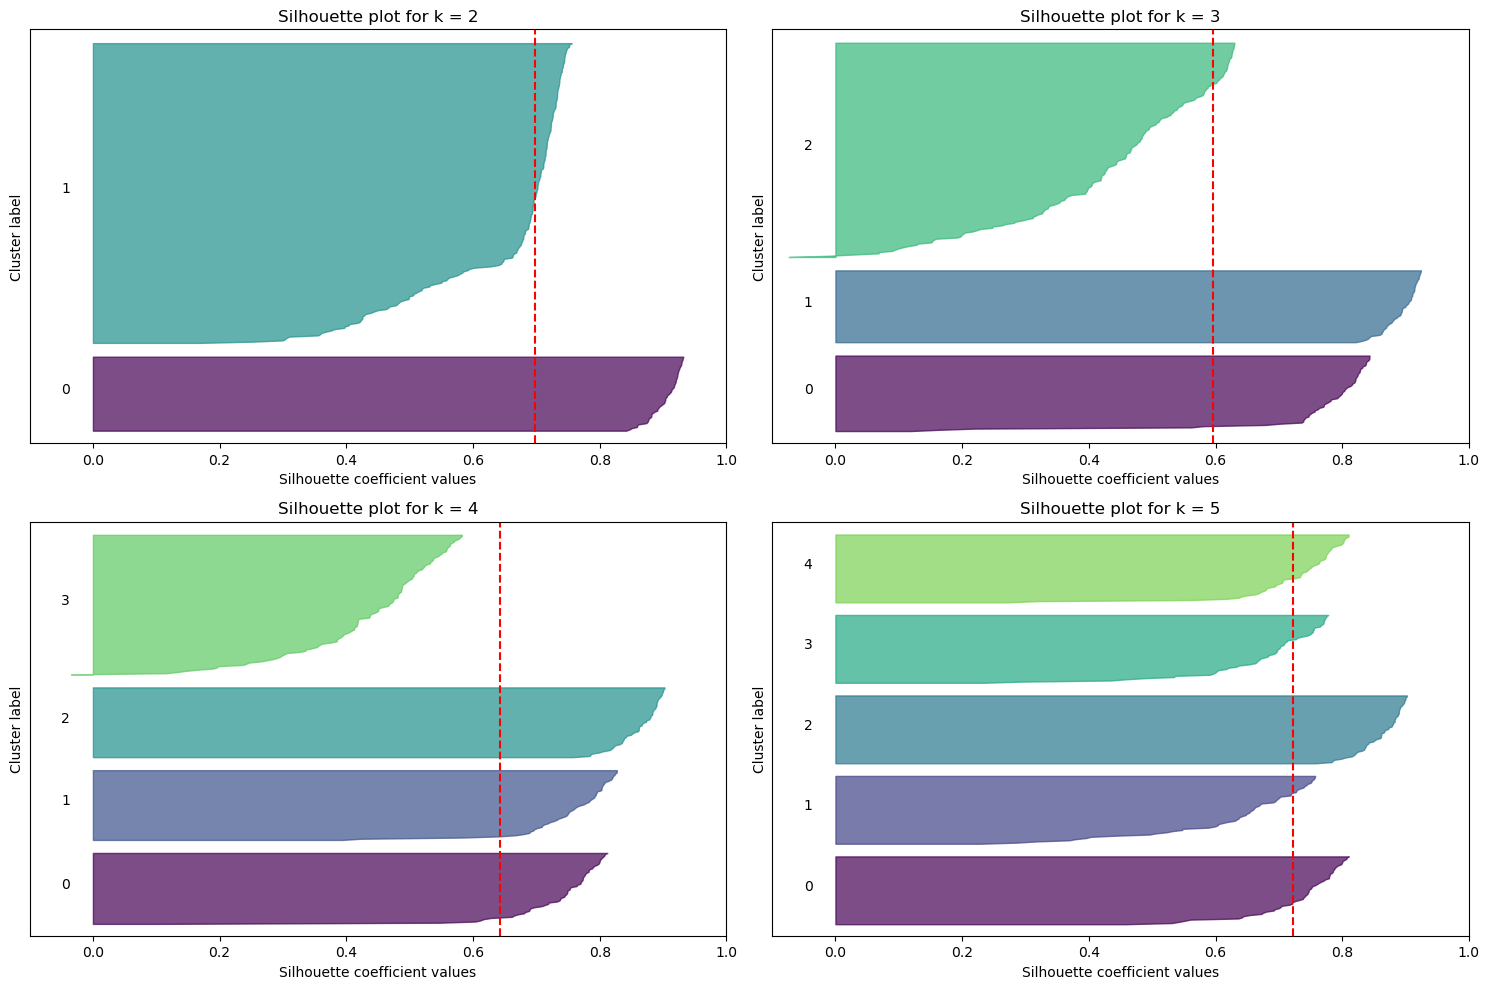

In [62]:
from sklearn.metrics import silhouette_samples, silhouette_score

# Generate sample data
X, y = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Range of k values to evaluate
k_values = [3, 4, 5, 6]

# Create a subplot for each k
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for idx, k in enumerate(k_values):
    # Initialize and fit the KMeans model
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, kmeans.labels_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    
    # Create the silhouette plot
    y_lower = 10
    for i in range(k):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans.labels_ == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = plt.cm.viridis(float(i) / k)  # Change colormap here
        axs[idx].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        axs[idx].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        y_lower = y_upper + 10
    
    # Plot the vertical line for the average silhouette score
    axs[idx].axvline(x=silhouette_avg, color="red", linestyle="--")
    axs[idx].set_title(f"Silhouette plot for k = {k}")
    axs[idx].set_xlabel("Silhouette coefficient values")
    axs[idx].set_ylabel("Cluster label")
    axs[idx].set_xlim([-0.1, 1])
    axs[idx].set_ylim([0, len(X) + (k + 1) * 10])
    axs[idx].set_yticks([])  # Clear the y-axis labels/marks

plt.tight_layout()
plt.show()


### Inferences from Silhouette Diagrams

- **k = 3**: Moderate clusters, not optimal.
- **k = 4**: Moderate clusters, well-defined clusters.
- **k = 5**: High silhouette scores, well-defined clusters.
- **k = 6**: Lower silhouette scores, less defined clusters.

### Conclusion

- **Best \( k \)**: 5.

### Limits of K-Means

K-means is fast and scalable, but it has some limitations:

- Requires multiple runs to avoid suboptimal solutions.
- The number of clusters must be specified in advance.
- Performs poorly with clusters of varying sizes, densities, or nonspherical shapes.

For example, k-means struggles with ellipsoidal clusters of different dimensions, densities, and orientations. Even with lower inertia, k-means may incorrectly assign clusters.


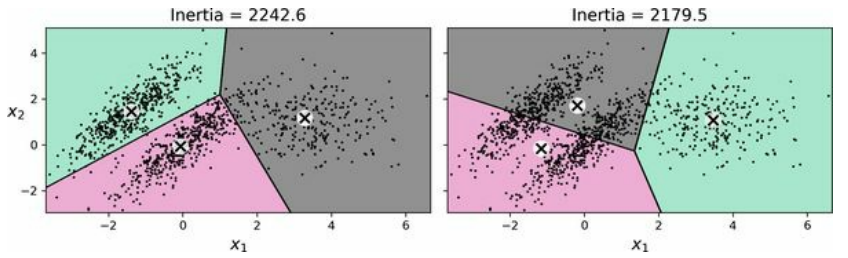

In [ ]:
kmeans.cluster_centers_